In [19]:
import numpy as np
from matplotlib import pyplot as plt

In [20]:
def pdf(phi, delta):
    return (heaviside(phi - 1) * heaviside(1+delta -phi) + heaviside(1 - phi) * heaviside(phi - 1/(delta + 1))/phi^2) /(2 * delta)

# The analytic distribution
is given by
$$
    P(\varphi) = \frac{1}{2 \delta} \left( \chi_{[1, 1+\delta]}{\varphi} + \frac{1}{\varphi^2} \chi_{[1/(1+\delta), 1]}(\varphi)\right)
$$
which is shown in the plot below.

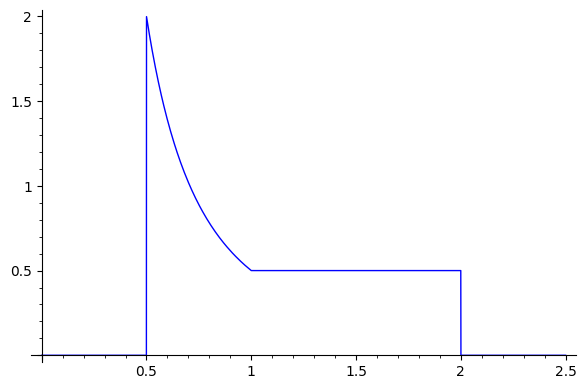

In [21]:
plot(lambda x: pdf(x, 1), x, 0, 2.5)

# Simulation
## Sampling $\varphi$
Sampling the given algorithm numerically with $N=1e6$ sweeps gives

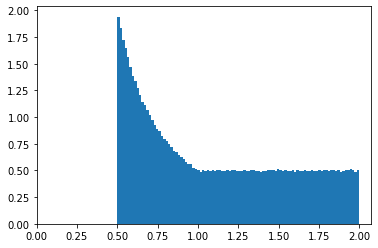

In [22]:
xs = np.loadtxt("data/phi.dat")
n_bins = 100
fig, ax = plt.subplots()
a = ax.hist(xs, bins=n_bins, density=True)
a = plt.xticks(np.arange(0, 2.1, step=0.25))

## Sampling method 1
with $N=1e6$ sweeps and the standard acceptance criterion.

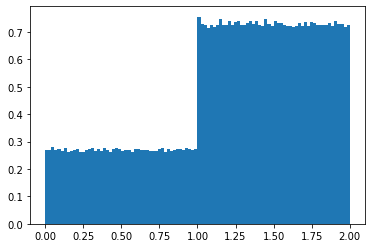

In [23]:
xs = np.loadtxt("data/full1.dat")
n_bins = 100
a = plt.hist(xs, bins=n_bins, density=True)

## Sampling method 2
First one has to derive the correct acceptance rule for $\varphi$.   
For that note first that $y = \varphi x$ i.e. $y = y(\varphi)$. So if we want to sample $y$, wen can change to sampling $\varphi$ by:
$$
P(x\to y) = P(\varphi) \bigg|\frac{d y}{d\varphi}\bigg|^{-1} = \frac{P(\varphi)}{x}
$$
Similarly we get 
$$
P(y\to x) = \frac{P(\varphi)}{y}
$$
Which gives the acceptance criterion
$$
P_{acc}(x\to y) = \operatorname{min}\left\{1, \frac{x}{y} e^{-\beta \Delta(x,y)} \right\}.
$$
with $N=1e6$ sweeps this looks like

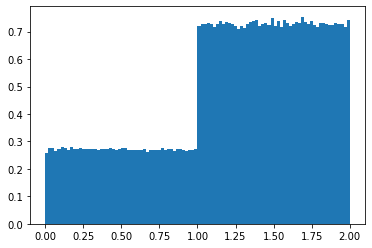

In [24]:
xs = np.loadtxt("data/full2.dat")
n_bins = 100
a = plt.hist(xs, bins=n_bins, density=True)

# Wrong acceptance criterion

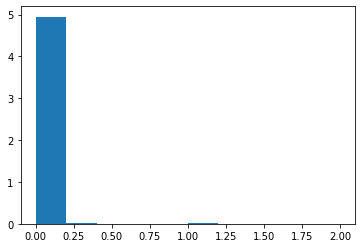

In [25]:
xs = np.loadtxt("data/wrong-crit.dat")
n_bins = 10
a = plt.hist(xs, bins=n_bins, density=True)